# IL - HW5
Ali Seaizadeh 810196477

In [2]:
import gym
import torch
import matplotlib.pyplot as plt
import numpy as np
from collections import deque, namedtuple

from dqn_agent import Agent

env = gym.make('LunarLander-v2')
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


In [28]:
buffer_size = [1e4, 1e5, 1e6]
agent_scores = []
for b in buffer_size:
    agent = Agent(state_size=8, action_size=4, buffer_size=b)
    n_episodes = 2000
    max_t = 2000
    eps_start = 1.0
    eps_end = 0.001
    eps_decay = 0.995

    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)

        n_episode_win = (i_episode + 1) % 100
        if (n_episode_win == 0):
            scores.append(np.mean(scores_window))

        eps = max(eps_end, eps_decay*eps)
        print('\rEpisode {}\tAverage Score: {:.1f}\tBuffer size = {}'.format(i_episode, np.mean(scores_window), b), end="")
        if np.mean(scores_window) >= 200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'optimal_network.pth')
            break

    agent_scores.append(scores)

Episode 816	Average Score: 200.5	Buffer size = 10000.00
Environment solved in 716 episodes!	Average Score: 200.55
Episode 1003	Average Score: 200.1	Buffer size = 100000.0
Environment solved in 903 episodes!	Average Score: 200.12
Episode 888	Average Score: 201.0	Buffer size = 1000000.00
Environment solved in 788 episodes!	Average Score: 201.04


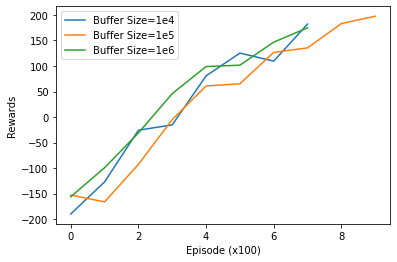

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(agent_scores[0])), agent_scores[0], label="Buffer Size=1e4")
plt.plot(np.arange(len(agent_scores[1])), agent_scores[1], label="Buffer Size=1e5")
plt.plot(np.arange(len(agent_scores[2])), agent_scores[2], label="Buffer Size=1e6")
plt.legend()
plt.ylabel('Rewards')
plt.xlabel('Episode (x100)')
plt.show()

In [3]:
from visualize import show_video_of_model
agent = Agent(state_size=8, action_size=4)
show_video_of_model(agent, 'LunarLander-v2')